In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install openpyxl

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/미니프로젝트_패켐/파이널프로젝트_RAW_210329_210926.xlsx')
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [ ]:
df.isna().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [ ]:
print(df['type'].unique())
print(df['state'].unique())
print(df['category_title'].unique())
print(df['format'].unique())
print(df['pg'].unique())
print(df['method'].unique())
print(df['subcategory_title'].unique())

['ORDER' 'PAYMENT' 'REFUND' 'TRANSACTION']
['CANCELLED' 'COMPLETED' 'PENDING' 'DELETED' 'REQUESTED']
['프로그래밍' '영상/3D' '업무 생산성' '크리에이티브' '부동산/금융' '데이터사이언스' '디자인' '마케팅' '교육'
 '투자/재테크' nan '관리' '데이터 사이언스' '비즈니스' '지식콘텐츠' '일러스트' '파이낸스']
['올인원' '스쿨 온라인' '온라인 완주반' 'RED' 'B2B 온라인' '캠프' '스쿨' nan 'B2B' '이벤트'
 '하루10분컷' '아카이브' '관리' '온라인' 'MBA' '콜로소' 'B2G']
[nan 'INICIS' 'KAKAO' 'CHAI' 'PAYCO' 'NAVER']
['VBANK' 'CARD' 'TRANS' 'PROMOTION' 'TRANSFER' 'ONSITE' 'B2B_CONTRACT' nan
 'POINT' 'VOUCHER']
['개발자 커리어' '영상 편집' nan 'PPT/보고서' '금융/투자 실무' '프론트엔드 개발' 'DevOps' 'UX/UI'
 '머신러닝' '모션그래픽' '딥러닝/인공지능' '글쓰기/카피라이팅' '디지털마케팅' '엑셀/VBA' '데이터분석' '디자인툴'
 '모바일앱' '업무자동화' 'SNS마케팅' '게임' '회계/재무/세무' '부동산 개발' '시각디자인' '백엔드 개발'
 '데이터마케팅' '일러스트' '부동산 투자' '코딩 입문' '커뮤니케이션' '리더십' '주식 투자' '게임 그래픽'
 '데이터엔지니어링' 'VFX']


# 결측치 처리 

In [ ]:
# state(결재 상태)는 completed만, type은 refund와 payment만 유효
df = df[df['state']=='COMPLETED']
df = df[(df['type']=='REFUND')|(df['type']=='PAYMENT')]
print(df['type'].unique())
print(df['state'].unique())

['PAYMENT' 'REFUND']
['COMPLETED']


In [ ]:
# category_title 이름 중복
df.loc[(df.category_title=='데이터 사이언스'),'category_title']= '데이터사이언스'
df['category_title'].unique()

array(['프로그래밍', '업무 생산성', '영상/3D', '부동산/금융', '데이터사이언스', '디자인', '마케팅',
       '크리에이티브', '투자/재테크', '교육', '관리', nan, '비즈니스', '지식콘텐츠', '파이낸스'],
      dtype=object)

In [ ]:
df.isna().sum()

id                            0
customer_id                   0
course_id                  2155
type                          0
state                         0
course_title                  1
category_title                4
format                        1
completed_at                  0
transaction_amount            0
coupon_title              32963
coupon_discount_amount    32963
sale_price                 1080
tax_free_amount            1080
pg                        10351
method                        0
subcategory_title         10304
marketing_start_at        10052
dtype: int64

In [ ]:
df.loc[df['category_title'].isna()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
41878,1078156,62566.0,NaN,REFUND,COMPLETED,프로모션 : 자유이용권 (3월),NaN,온라인,2021-05-26 22:06:00,-199000,NaN,NaN,199000.0,199000.0,NaN,TRANSFER,NaN,NaT
47361,1117129,549990.0,NaN,PAYMENT,COMPLETED,NaN,NaN,NaN,2021-06-02 16:48:37,10500000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaT
72639,1212937,591404.0,NaN,PAYMENT,COMPLETED,프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...,NaN,올인원,2021-07-12 23:38:42,990000,NaN,NaN,990000.0,272800.0,INICIS,CARD,NaN,NaT
74975,1223480,598011.0,NaN,PAYMENT,COMPLETED,프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프...,NaN,올인원,2021-07-18 12:31:01,990000,NaN,NaN,990000.0,272800.0,INICIS,CARD,NaN,NaT


In [ ]:
# case 4개는 결과에 영향 미미하므로 행 삭제
df.drop(index=[41878,47361,72639,74975], axis=0, inplace=True)
df.isna().sum()

id                            0
customer_id                   0
course_id                  2151
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title              32959
coupon_discount_amount    32959
sale_price                 1079
tax_free_amount            1079
pg                        10349
method                        0
subcategory_title         10300
marketing_start_at        10048
dtype: int64

In [ ]:
# 필요없는 열 삭제, 결측치 처리 
del df['course_id']
del df['tax_free_amount']
df['pg'].fillna('ETC', inplace=True)
df['coupon_title'].fillna('사용안함', inplace=True)
df['coupon_discount_amount'].fillna(0.0,inplace=True)
df.loc[df.sale_price.isnull(),'sale_price'] = 0.0
df.isna().sum()

id                            0
customer_id                   0
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title                  0
coupon_discount_amount        0
sale_price                    0
pg                            0
method                        0
subcategory_title         10300
marketing_start_at        10048
dtype: int64

In [ ]:
df['subcategory_title'].value_counts()

영상 편집        3868
백엔드 개발       3647
개발자 커리어      3289
프론트엔드 개발     2973
딥러닝/인공지능     2436
데이터분석        2226
PPT/보고서      2184
엑셀/VBA       2082
디자인툴         2035
모바일앱         1968
글쓰기/카피라이팅    1801
일러스트         1701
UX/UI        1421
DevOps       1287
주식 투자        1194
금융/투자 실무     1187
데이터마케팅       1168
머신러닝         1130
회계/재무/세무     1044
모션그래픽        1024
시각디자인        1008
게임            907
디지털마케팅        904
SNS마케팅        705
부동산 개발        633
업무자동화         514
코딩 입문         448
부동산 투자        403
VFX           379
리더십           296
게임 그래픽        245
데이터엔지니어링      190
커뮤니케이션        123
Name: subcategory_title, dtype: int64

In [ ]:
#subcategory_title 결측치 처리

df.loc[(df.course_title.str.contains('영상') ==True),'course_title'].unique()
df.loc[df.subcategory_title.isnull(),'course_title'].unique()
#각 subcategory에 맞는 키워드로 course_title에서 검색하거나, subcategory 결측치 의 course_title을 직접 검색했다.

df.loc[(df.course_title.str.contains('영상') ==True)]
df.loc[(df.course_title.str.contains('영상') ==True)&df.subcategory_title.isnull()]
# 검색한 결과중 결측치가 아닌 것은 어떻게 쓰였나 참고하여 결측치를 채우거나(아래), 결측치가 없는 키워드는 생략하기도 했다.

In [ ]:
df.loc[(df.course_title.str.contains('영상') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '영상 편집'
df.loc[(df.course_title.str.contains('프론트엔드') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '프론트엔드 개발'
df.loc[(df.course_title.str.contains('딥러닝') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '딥러닝/인공지능'
df.loc[(df.course_title.str.contains('모바일앱') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '모바일앱'
df.loc[(df.course_title.str.contains('개발자') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('백엔드') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '백엔드 개발'
df.loc[(df.course_title.str.contains('인공지능') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '딥러닝/인공지능'
df.loc[(df.course_title.str.contains('PPT') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = 'PPT/보고서'
df.loc[(df.course_title.str.contains('보고서') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = 'PPT/보고서'
df.loc[(df.course_title.str.contains('DevOps') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = 'DevOps'
df.loc[(df.course_title.str.contains('UX/UI') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = 'UX/UI'
df.loc[(df.course_title.str.contains('모션그래픽') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '모션그래픽'
df.loc[(df.course_title.str.contains('업무자동화') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '업무자동화'
df.loc[(df.course_title.str.contains('SNS') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = 'SNS마케팅'
df.loc[(df.course_title.str.contains('디지털 마케팅') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
df.loc[(df.course_title.str.contains('그로스 마케팅') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
df.loc[(df.course_title.str.contains('데이터 기반') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
df.loc[(df.course_title.str.contains('마케팅 한끝세트') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
df.loc[(df.course_title.str.contains('마케팅 백과사전') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
df.loc[(df.course_title.str.contains('풀스택 마케터') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
df.loc[(df.course_title.str.contains('개인화 마케팅') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
df.loc[(df.course_title.str.contains('마테크') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
df.loc[(df.course_title.str.contains('B2B') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = 'B2B'
df.loc[(df.course_title.str.contains('마케팅 벼락치기') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
df.loc[(df.course_title.str.contains('게임개발') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '게임'
df.loc[(df.course_title.str.contains('게임 제작') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '게임'
df.loc[(df.course_title.str.contains('게임 디자인') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '게임 그래픽'
df.loc[(df.course_title.str.contains('모델링') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '게임 그래픽'
df.loc[(df.course_title.str.contains('부동산 투자') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '부동산 투자'
df.loc[(df.course_title.str.contains('부동산 디벨로퍼') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '부동산 개발'
df.loc[(df.course_title.str.contains('부동산 재테크') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '부동산 투자'
df.loc[(df.course_title.str.contains('부동산 개발') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '부동산 개발'
df.loc[(df.course_title.str.contains('엑셀') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '엑셀/VBA'
df.loc[(df.course_title.str.contains('데이터분석') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
df.loc[(df.course_title.str.contains('시각디자인') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '시각디자인'
df.loc[(df.course_title.str.contains('재무제표') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
df.loc[(df.course_title.str.contains('자금조달') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
df.loc[(df.course_title.str.contains('금융ㆍ투자') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '금융/투자 실무'
df.loc[(df.course_title.str.contains('재무/세무') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
df.loc[(df.course_title.str.contains('회계') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
df.loc[(df.course_title.str.contains('포토샵&일러스트레이터') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '디자인툴'
df.loc[(df.course_title.str.contains('일러스트') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '일러스트'
df.loc[(df.course_title.str.contains('VFX') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = 'VFX'
df.loc[(df.course_title.str.contains('웹 개발') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '백엔드 개발'
df.loc[(df.course_title.str.contains('컴퓨터 공학') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('투자의 정석') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '주식 투자'
df.loc[(df.course_title.str.contains('마스터 코딩') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '코딩 입문'
df.loc[(df.course_title.str.contains('기업분석') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '주식 투자'
df.loc[(df.course_title.str.contains('클론코딩') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '코딩 입문'
df.loc[(df.course_title.str.contains('ADsP') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
df.loc[(df.course_title.str.contains('풀스택 개발') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('개발 풀스택') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('웹 프로그래밍') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '백엔드 개발'
df.loc[(df.course_title.str.contains('데이터 사이언스') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
df.loc[(df.course_title.str.contains('리팩터링') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('마케터') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '마케터'
df.loc[(df.course_title.str.contains('SQL') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
df.loc[(df.course_title.str.contains('HTML/CSS') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '프론트엔드 개발'
df.loc[(df.course_title.str.contains('코딩+알고리즘') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('자연어') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '딥러닝/인공지능'
df.loc[(df.course_title.str.contains('앱개발') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('데이터') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
df.loc[(df.course_title.str.contains('파이썬 자동화') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('비즈니스 영어') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '커뮤니케이션'
df.loc[(df.course_title.str.contains('스피치 10분컷') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '커뮤니케이션'
df.loc[(df.course_title.str.contains('디자인') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '디자인툴'
df.loc[(df.course_title.str.contains('알고리즘') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('Financial Modeling') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('Spring') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('데이터베이스') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
df.loc[(df.course_title.str.contains('데이터사이언스') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
df.loc[(df.course_title.str.contains('파이썬') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('객체지향') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('React') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('코딩') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('데이터기반') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
df.loc[(df.course_title.str.contains('개발') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
df.loc[(df.course_title.str.contains('데이터 사이언스') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
df.loc[(df.course_title.str.contains('데이터 분석') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
df.loc[(df.course_title.str.contains('빅데이터') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
df.loc[(df.course_title.str.contains('금융/투자') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '금융/투자 실무'
df.loc[(df.course_title.str.contains('기업투자') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = '주식 투자'
df.loc[df.subcategory_title.isnull(),'subcategory_title'] = '기타'
df.isna().sum()

id                            0
customer_id                   0
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title                  0
coupon_discount_amount        0
sale_price                    0
pg                            0
method                        0
subcategory_title             0
marketing_start_at        10048
dtype: int64

In [8]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/미니프로젝트_패켐/FC_project_vol2.csv', index=False)

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/미니프로젝트_패켐/FC_project_vol2.csv')

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (30.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [3]:
df['subcategory_title'].value_counts().index

Index(['프론트엔드 개발', '영상 편집', '백엔드 개발', '개발자 커리어', '데이터분석', '딥러닝/인공지능', '엑셀/VBA',
       'PPT/보고서', '디자인툴', '모바일앱', 'B2B', '글쓰기/카피라이팅', '일러스트', 'UX/UI',
       '디지털마케팅', '주식 투자', 'DevOps', '금융/투자 실무', '데이터마케팅', '머신러닝', '회계/재무/세무',
       '모션그래픽', '시각디자인', '커뮤니케이션', '게임', '기타', 'SNS마케팅', '부동산 개발', '업무자동화',
       '코딩 입문', '부동산 투자', 'VFX', '리더십', '게임 그래픽', '데이터엔지니어링', '마케터'],
      dtype='object')

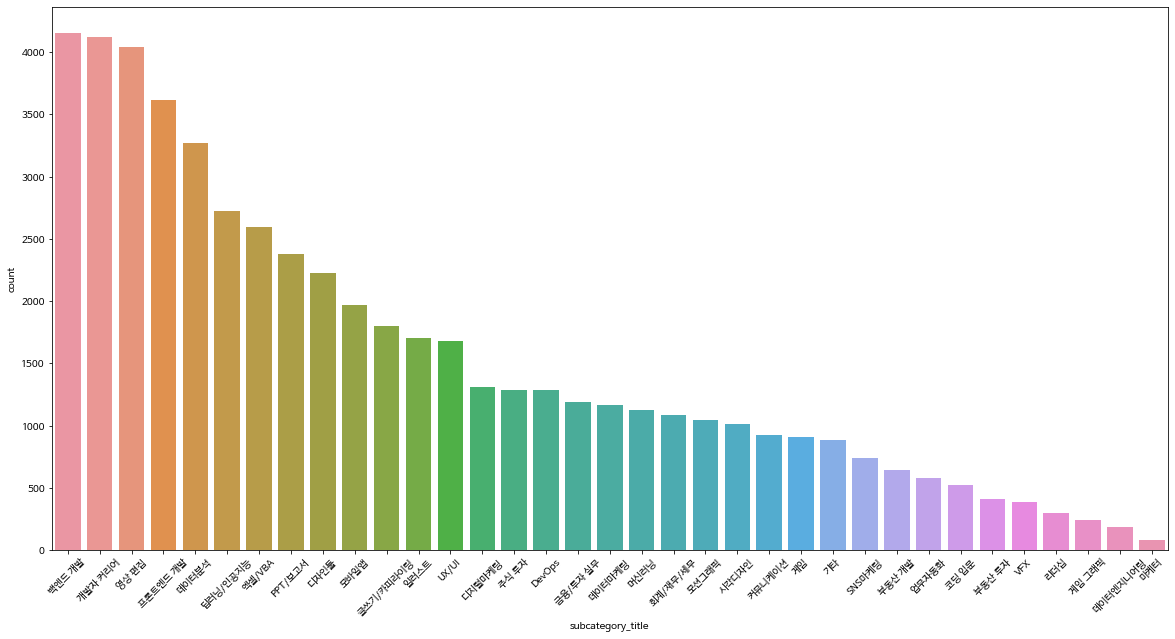

In [104]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='subcategory_title',order = df['subcategory_title'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56720 entries, 0 to 56719
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      56720 non-null  int64  
 1   customer_id             56720 non-null  float64
 2   type                    56720 non-null  object 
 3   state                   56720 non-null  object 
 4   course_title            56720 non-null  object 
 5   category_title          56720 non-null  object 
 6   format                  56720 non-null  object 
 7   completed_at            56720 non-null  object 
 8   transaction_amount      56720 non-null  int64  
 9   coupon_title            56720 non-null  object 
 10  coupon_discount_amount  56720 non-null  float64
 11  sale_price              56720 non-null  float64
 12  pg                      56720 non-null  object 
 13  method                  56720 non-null  object 
 14  subcategory_title       56720 non-null

In [6]:
df.loc[(df['transaction_amount']==0)&(df['sale_price']==1),'course_title'].unique()

array(['스프링 아카데미아 15개 영상강의 코스(5월) - 샘플 강의 제공용',
       '네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트', '네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트'],
      dtype=object)

In [7]:
cond = df[(df['transaction_amount']==0)&(df['sale_price']==1)].index
df.drop(cond, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55528 entries, 0 to 56719
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      55528 non-null  int64  
 1   customer_id             55528 non-null  float64
 2   type                    55528 non-null  object 
 3   state                   55528 non-null  object 
 4   course_title            55528 non-null  object 
 5   category_title          55528 non-null  object 
 6   format                  55528 non-null  object 
 7   completed_at            55528 non-null  object 
 8   transaction_amount      55528 non-null  int64  
 9   coupon_title            55528 non-null  object 
 10  coupon_discount_amount  55528 non-null  float64
 11  sale_price              55528 non-null  float64
 12  pg                      55528 non-null  object 
 13  method                  55528 non-null  object 
 14  subcategory_title       55528 non-null

# 단체 고객 제거

단체고객은 sale_price 가 0이어서 제외한다.

(sale_price 가 null 값인 데이터를 0으로 처리했다)

In [22]:
df_group = df.loc[(df['format']=='B2B')|(df['format']=='B2B 온라인')|(df['format']=='B2G')]
df_group['format'].value_counts()
#df.loc[(df.course_title.str.contains('B2B') ==True)&df.subcategory_title.isnull(),'subcategory_title'] = 'B2B'

B2B 온라인    984
B2B        485
B2G        434
Name: format, dtype: int64

In [23]:
df_group.to_csv('/content/drive/MyDrive/Colab Notebooks/미니프로젝트_패켐/FC_project_B2B.csv', index=False)

In [24]:
df = df.loc[(df['format']!= 'B2B')&(df['format']!='B2B 온라인')&(df['format']!='B2G')]
df['format'].value_counts()

올인원        46540
RED         3383
온라인 완주반     1671
하루10분컷      1371
스쿨 온라인       398
스쿨            89
이벤트           89
아카이브          35
캠프            25
MBA           23
관리             1
Name: format, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53625 entries, 0 to 55527
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      53625 non-null  int64  
 1   customer_id             53625 non-null  float64
 2   type                    53625 non-null  object 
 3   state                   53625 non-null  object 
 4   course_title            53625 non-null  object 
 5   category_title          53625 non-null  object 
 6   format                  53625 non-null  object 
 7   completed_at            53625 non-null  object 
 8   transaction_amount      53625 non-null  int64  
 9   coupon_title            53625 non-null  object 
 10  coupon_discount_amount  53625 non-null  float64
 11  sale_price              53625 non-null  float64
 12  pg                      53625 non-null  object 
 13  method                  53625 non-null  object 
 14  subcategory_title       53625 non-null

# 분석 목표



*   금액별 분석 : 판매 되는 가격과 실제 결제 가격의 차이가 얼마나 될까? 쿠폰할인, PG사 포인트할인 등을 사용해 얼마나 할인을 받아 구매가 이루어지는지, 쿠폰을 안쓰는 사람들은 얼마나 있는지
*   콘텐츠 기획 분석 : 사람들은 어떤 콘텐츠를 많이 구매할까? 마케팅 효과가 있는지, 특정 그룹의 상품이 효과가 있는지 등을 확인




sale_price 가 0 또는 null값인 데이터 (예외 데이터)

In [36]:
df[df.sale_price == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 1084 to 47039
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      108 non-null    int64  
 1   customer_id             108 non-null    float64
 2   type                    108 non-null    object 
 3   state                   108 non-null    object 
 4   course_title            108 non-null    object 
 5   category_title          108 non-null    object 
 6   format                  108 non-null    object 
 7   completed_at            108 non-null    object 
 8   transaction_amount      108 non-null    int64  
 9   coupon_title            108 non-null    object 
 10  coupon_discount_amount  108 non-null    float64
 11  sale_price              108 non-null    float64
 12  pg                      108 non-null    object 
 13  method                  108 non-null    object 
 14  subcategory_title       108 non-null 

In [32]:
df.loc[df.sale_price == 0, 'course_title'].value_counts()

데이터 사이언스 취업완성 스쿨 17기                                          79
올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020                               4
올인원 패키지 : 부동산 디벨로퍼                                             2
부동산 디벨로퍼 아카데미 : 인허가                                            2
올인원 패키지 : 리눅스 실전 정복                                            1
올인원 패키지 : 영상 제작/편집 (**운영되지 않는 코스입니다)                           1
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                                    1
초격차 패키지 : 한 번에 끝내는 일러스트레이터 활용                                  1
초격차 패키지 : 한번에 끝내는 UX/UI 디자인                                    1
매주)엑셀+데이터분석 온라인 완주반                                            1
초격차 패키지 : 한 번에 끝내는 데이터 분석                                      1
올인원 패키지 : 권오상의 금융 아카데미 - 권오상 회계사의 자금조달 분석 및 가치평가 (수강시간 제한)     1
올인원 패키지 : 파이썬을 활용한 이커머스 데이터 분석                                 1
올인원 패키지 : 알고리즘 기술면접 완전 정복                                      1
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                             1
올인원 패키지 : 모두를 위한 SQL/DB  

In [34]:
df.loc[df.sale_price == 0, 'method'].value_counts()

ONSITE      79
TRANSFER    29
Name: method, dtype: int64

In [56]:
# 예외 데이터 수가 작아서 EDA에는 영향이 미미해보이므로 행삭제
idx1 =df[df.sale_price == 0].index
idx1

df1 = df.drop(idx1)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 53517 entries, 0 to 55527
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      53517 non-null  int64  
 1   customer_id             53517 non-null  float64
 2   type                    53517 non-null  object 
 3   state                   53517 non-null  object 
 4   course_title            53517 non-null  object 
 5   category_title          53517 non-null  object 
 6   format                  53517 non-null  object 
 7   completed_at            53517 non-null  object 
 8   transaction_amount      53517 non-null  int64  
 9   coupon_title            53517 non-null  object 
 10  coupon_discount_amount  53517 non-null  float64
 11  sale_price              53517 non-null  float64
 12  pg                      53517 non-null  object 
 13  method                  53517 non-null  object 
 14  subcategory_title       53517 non-null

In [48]:
df1['transaction_amount'].value_counts()

 0         3499
 99000      891
 119000     855
 299000     843
 129000     817
           ... 
 439375       1
-166500       1
-79328        1
-59708        1
 347650       1
Name: transaction_amount, Length: 2073, dtype: int64

In [49]:
df1.loc[(df1.type =='REFUND')&(df1.transaction_amount > 0),'transaction_amount']

Series([], Name: transaction_amount, dtype: int64)

In [57]:
df1.loc[(df1.type =='REFUND')]

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
266,972377,444760.0,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,사용안함,0.0,404000.0,ETC,VBANK,마케터,NaN
267,972381,472666.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,사용안함,0.0,116000.0,ETC,CARD,영상 편집,2020-12-02 00:00:00
275,972409,447177.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,사용안함,0.0,89000.0,ETC,CARD,일러스트,2021-02-19 00:00:00
278,972422,373915.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,사용안함,0.0,340000.0,ETC,VBANK,데이터분석,2021-03-08 00:00:00
280,972436,456086.0,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,사용안함,0.0,299000.0,ETC,CARD,프론트엔드 개발,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55348,1363708,600073.0,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,사용안함,0.0,179000.0,NAVER,CARD,백엔드 개발,2021-07-15 00:00:00
55351,1363721,645911.0,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,사용안함,0.0,1400000.0,INICIS,CARD,마케터,NaN
55378,1363934,506356.0,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,사용안함,0.0,259000.0,NAVER,CARD,영상 편집,2021-08-17 00:00:00
55407,1364149,604077.0,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,사용안함,0.0,129000.0,KAKAO,POINT,엑셀/VBA,2021-08-17 00:00:00


환불 고객의 최종거래 금액은 음수이다

In [58]:
df1['discount'] = df1.loc[(df1.type =='REFUND'),'sale_price'] + df1.loc[(df1.type =='REFUND'),'transaction_amount']
df1.loc[(df1.type =='PAYMENT'),'discount'] = df1.loc[(df1.type =='PAYMENT'),'sale_price'] - df1.loc[(df1.type =='PAYMENT'),'transaction_amount']
df1.head()

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,discount
0,970657,72297.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,ETC,CARD,프론트엔드 개발,2021-03-04 00:00:00,19090.0
1,970658,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,ETC,CARD,PPT/보고서,2019-11-14 00:00:00,20000.0
2,970669,478033.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,ETC,CARD,영상 편집,2020-12-02 00:00:00,20000.0
3,970671,469860.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,사용안함,0.0,263000.0,ETC,CARD,회계/재무/세무,2020-11-27 00:00:00,0.0
4,970676,478035.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02 00:00:00,20000.0


In [59]:
df1[df1.type =='REFUND'].head()

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,discount
266,972377,444760.0,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,사용안함,0.0,404000.0,ETC,VBANK,마케터,NaN,257000.0
267,972381,472666.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,사용안함,0.0,116000.0,ETC,CARD,영상 편집,2020-12-02 00:00:00,20000.0
275,972409,447177.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,사용안함,0.0,89000.0,ETC,CARD,일러스트,2021-02-19 00:00:00,10000.0
278,972422,373915.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,사용안함,0.0,340000.0,ETC,VBANK,데이터분석,2021-03-08 00:00:00,0.0
280,972436,456086.0,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,사용안함,0.0,299000.0,ETC,CARD,프론트엔드 개발,NaN,0.0


In [61]:
df1['other_dis'] = df1['discount']-df1['coupon_discount_amount']
df1[(df1.other_dis != 0)]
# df.loc[(df.other_dis != 0),'other_dis']

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,discount,other_dis
192,972001,458172.0,PAYMENT,COMPLETED,올인원 패키지 : TypeScript & Angular 실전,프로그래밍,올인원,2021-03-29 00:14:32,0,수강생 50만명 돌파 기념 감사제 쿠폰,111000.0,101000.0,ETC,PROMOTION,프론트엔드 개발,NaN,101000.0,-10000.0
200,972056,464239.0,PAYMENT,COMPLETED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-29 00:55:02,0,수강생 50만명 돌파 기념 감사제 쿠폰,117500.0,110500.0,ETC,PROMOTION,개발자 커리어,NaN,110500.0,-7000.0
209,972116,440315.0,PAYMENT,COMPLETED,합격 패스 : 정보처리기사 필기&실기,프로그래밍,올인원,2021-03-29 01:51:17,0,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,9900.0,ETC,PROMOTION,개발자 커리어,NaN,9900.0,-100.0
211,972122,440315.0,PAYMENT,COMPLETED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-29 01:56:59,0,수강생 50만명 돌파 기념 감사제 쿠폰,115500.0,110500.0,ETC,PROMOTION,개발자 커리어,NaN,110500.0,-5000.0
214,972140,464106.0,PAYMENT,COMPLETED,올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵,디자인,올인원,2021-03-29 02:11:44,0,수강생 50만명 돌파 기념 감사제 쿠폰,125000.0,87600.0,ETC,PROMOTION,디자인툴,2020-10-23 00:00:00,87600.0,-37400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55321,1363558,656066.0,REFUND,COMPLETED,초격차 패키지 : 한 번에 끝내는 디지털 마케팅,마케팅,올인원,2021-09-24 13:33:08,-213000,사용안함,0.0,233000.0,INICIS,CARD,디지털마케팅,2021-08-17 00:00:00,20000.0,20000.0
55326,1363576,648937.0,REFUND,COMPLETED,올인원 패키지 : 완전정복 시각디자인 기초,디자인,올인원,2021-09-24 13:43:57,-72000,사용안함,0.0,174000.0,NAVER,CARD,시각디자인,2021-03-16 00:00:00,102000.0,102000.0
55348,1363708,600073.0,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,사용안함,0.0,179000.0,NAVER,CARD,백엔드 개발,2021-07-15 00:00:00,30000.0,30000.0
55407,1364149,604077.0,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,사용안함,0.0,129000.0,KAKAO,POINT,엑셀/VBA,2021-08-17 00:00:00,20000.0,20000.0


In [64]:
df1.to_csv('/content/drive/MyDrive/Colab Notebooks/미니프로젝트_패켐/FC_project_vol3.csv', index=False)

In [76]:
df_dis = df1[(df1.other_dis > 0)]
# 기타할인이 0보다 작은 것은 쿠폰 혜택을 다 못받은 경우

In [105]:
df_dis.to_csv('/content/drive/MyDrive/Colab Notebooks/미니프로젝트_패켐/FC_project_etcdisc.csv', index=False)

In [98]:
df_dis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1834 entries, 266 to 55410
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1834 non-null   int64  
 1   customer_id             1834 non-null   float64
 2   type                    1834 non-null   object 
 3   state                   1834 non-null   object 
 4   course_title            1834 non-null   object 
 5   category_title          1834 non-null   object 
 6   format                  1834 non-null   object 
 7   completed_at            1834 non-null   object 
 8   transaction_amount      1834 non-null   int64  
 9   coupon_title            1834 non-null   object 
 10  coupon_discount_amount  1834 non-null   float64
 11  sale_price              1834 non-null   float64
 12  pg                      1834 non-null   object 
 13  method                  1834 non-null   object 
 14  subcategory_title       1834 non-null

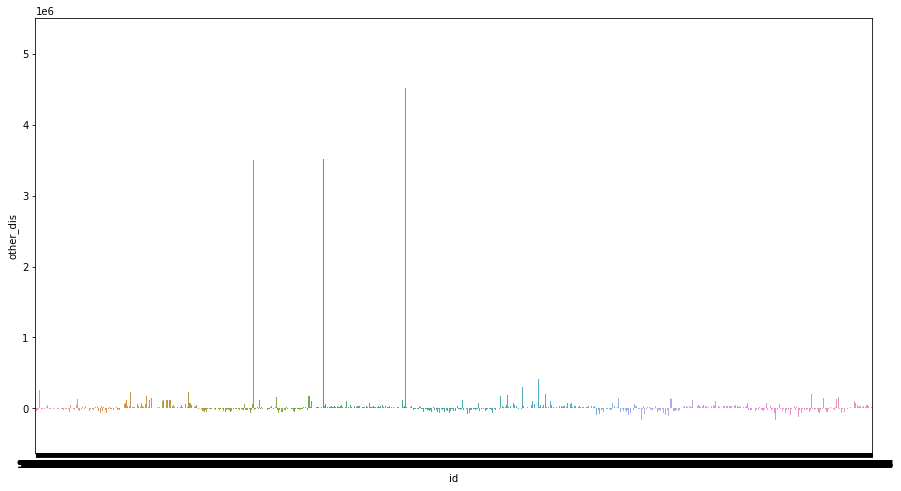

In [73]:
plt.figure(figsize=(15,8))
sns.barplot(data= df_dis, x = 'id', y = 'other_dis')
# plt.bar(df_dis['id'], df_dis['other_dis'])
plt.show()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 재시작

In [78]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [88]:
def cnt(x):
    if 0<x :
        return "1"
    else:
        return "0"

df_dis['cnt'] = df_dis['other_dis'].map(cnt)
df_dis[(df_dis.other_dis < 0)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,discount,other_dis,cnt


In [95]:
pd.crosstab([df_dis.format], [df_dis.cnt], margins=False).style.background_gradient(cmap = 'summer_r')

cnt,1
format,
RED,25
스쿨,10
스쿨 온라인,25
아카이브,3
온라인 완주반,227
올인원,1532
캠프,3
하루10분컷,9


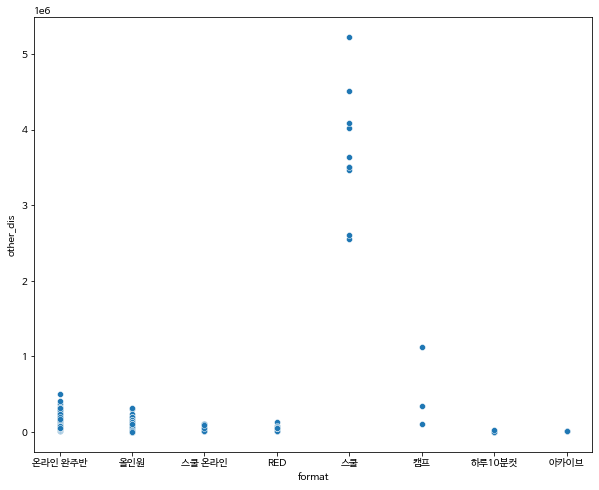

In [103]:
plt.figure(figsize=(10,8))
sns.scatterplot(data= df_dis, x = 'format', y = 'other_dis')
# plt.bar(df_dis['id'], df_dis['other_dis'])
plt.show()

In [97]:
pd.crosstab([df_dis.method, df_dis.pg], [df_dis.cnt], margins=False).style.background_gradient(cmap = 'summer_r')

카드나 포인트 결제로 기타 할인을 받은 경우가 많다.

ONSITE는 B2G 포맷으로 구매한 경우이다

In [100]:
df['method'].unique()

array(['CARD', 'VBANK', 'TRANS', 'PROMOTION', 'TRANSFER', 'ONSITE',
       'POINT', 'VOUCHER'], dtype=object)

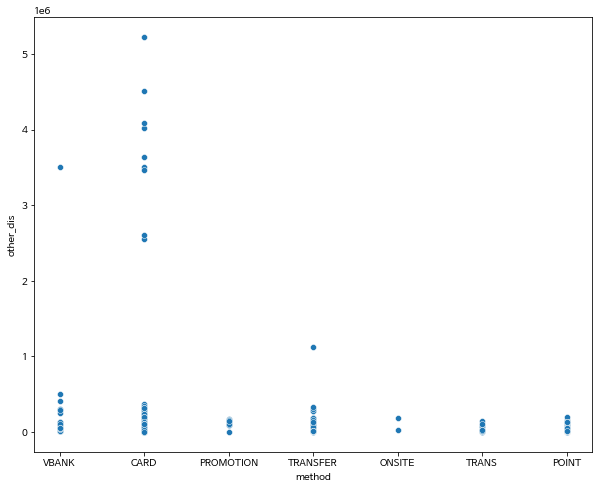

In [102]:
plt.figure(figsize=(10,8))
sns.scatterplot(data= df_dis, x = 'method', y = 'other_dis')
# plt.bar(df_dis['id'], df_dis['other_dis'])
plt.show()

In [94]:
pd.crosstab( [df_dis.category_title,df_dis.subcategory_title], [df_dis.cnt], margins=False).style.background_gradient(cmap = 'summer_r')

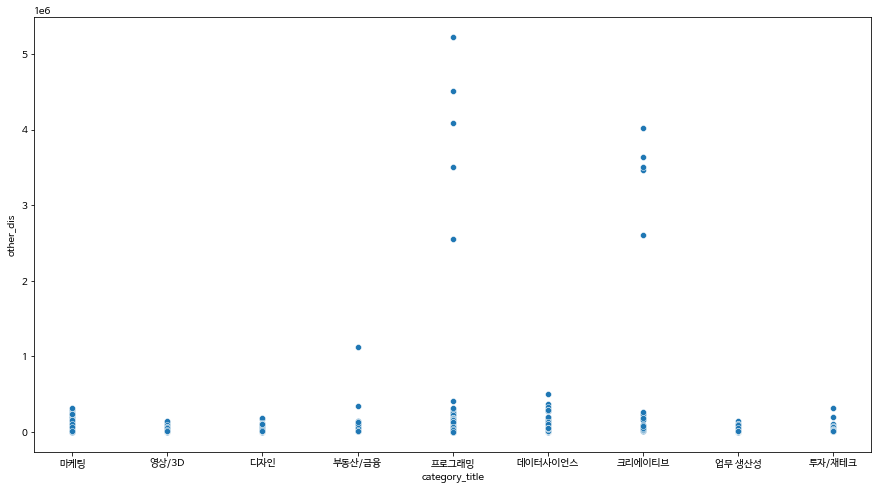

In [101]:
plt.figure(figsize=(15,8))
sns.scatterplot(data= df_dis, x = 'category_title', y = 'other_dis')
# plt.bar(df_dis['id'], df_dis['other_dis'])
plt.show()

In [85]:
df_dis.loc[(df_dis.category_title =='크리에이티브'),'subcategory_title'].value_counts()

기타        33
UX/UI     14
모션그래픽      8
디자인툴       3
디지털마케팅     1
Name: subcategory_title, dtype: int64